In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [28]:
## Create the dataframe for the model by importing the synergies CSVs

dataframe = pd.DataFrame() # init an empty DataFrame

# For each available year, read the csv as a dataframe and append it to the initial one
for year in range(2020, 2025):
    df = pd.read_csv(f'D:\\Uni\\dissertation\\data\\historic_synergies\\historic_data_{year}.csv')
    dataframe = pd.concat([dataframe, df])

# Data cleaning
dataframe = dataframe.dropna(subset=['SynergyScore'])       # Remove invalid Synergy scores
dataframe = dataframe.loc[dataframe['SynergyScore'] != 0]   # Remove rows with Synergy Score 0 (most likely errors)
dataframe = dataframe.loc[dataframe['Avg_Q'] != 0]          # Remove Qualifying outliers
# It is not necessary for the other columns, as there are no zero values (except for DNFRate, where it is possible to be 0)

print(dataframe.head())

   Unnamed: 0            Driver  Season  Teammate_delta  Lap_stdev     Avg_Q  \
0           0    Lewis Hamilton    2020       -0.524481   1.428011  1.687500   
1           1   Valtteri Bottas    2020        0.514455   1.689548  2.294118   
2           2    Max Verstappen    2020       -0.757881   1.790402  3.117647   
4           4  Daniel Ricciardo    2020       -0.409839   1.778044  7.705882   
5           5      Carlos Sainz    2020       -0.128839   1.925692  8.294118   

      Avg_R    DNFRate  SynergyScore  
0  1.875000   0.000000     -3.811805  
1  5.176471   0.000000     -9.886762  
2  7.117647  11.764706    -45.140430  
4  7.470588   0.000000    -13.170918  
5  8.941176   5.882353    -33.366154  


In [29]:
# Normalize Synergy Score values using a MinMax Scaler

scaler = MinMaxScaler(feature_range=(0, 100))
dataframe['SynergyScore'] = scaler.fit_transform(dataframe[['SynergyScore']])

print(dataframe.head(10)[['Driver', 'Season', 'SynergyScore']])


              Driver  Season  SynergyScore
0     Lewis Hamilton    2020    100.000000
1    Valtteri Bottas    2020     94.888482
2     Max Verstappen    2020     65.225761
4   Daniel Ricciardo    2020     92.125167
5       Carlos Sainz    2020     75.132732
6    Alexander Albon    2020     59.997197
7    Charles Leclerc    2020     44.885001
8       Lando Norris    2020     90.109950
9       Pierre Gasly    2020     72.785877
10      Lance Stroll    2020     40.656324


In [30]:
# Train a Random Forest Regressor model
X = dataframe[['Teammate_delta', 'Lap_stdev', 'Avg_Q', 'Avg_R', 'DNFRate']]
y = dataframe['SynergyScore']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [31]:
predictions = model.predict(X_test)

rmse_test = root_mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Test RMSE: ", rmse_test)
print("Test MAE: ", mae)
print("R² Score:", r2)

Test RMSE:  4.137614101082671
Test MAE:  2.4797729198786307
R² Score: 0.9633227848414591


5      80.228364
2      68.083982
3      52.505239
0      87.762878
0     100.000000
7      89.179833
4      54.317804
17     69.350867
11     87.501039
10     84.149311
11     58.363637
19     80.863882
19      0.000000
11     85.527918
13     86.620182
5      75.132732
21     81.445829
11     51.483161
16     69.332459
Name: SynergyScore, dtype: float64
[ 80.22836384  68.08398235  52.50523859  87.76287815 100.
  89.17983278  54.3178036   69.3508674   87.50103942  84.14931114
  58.36363669  80.86388155   0.          85.52791812  86.62018243
  75.13273207  81.44582945  51.48316142  69.33245886]


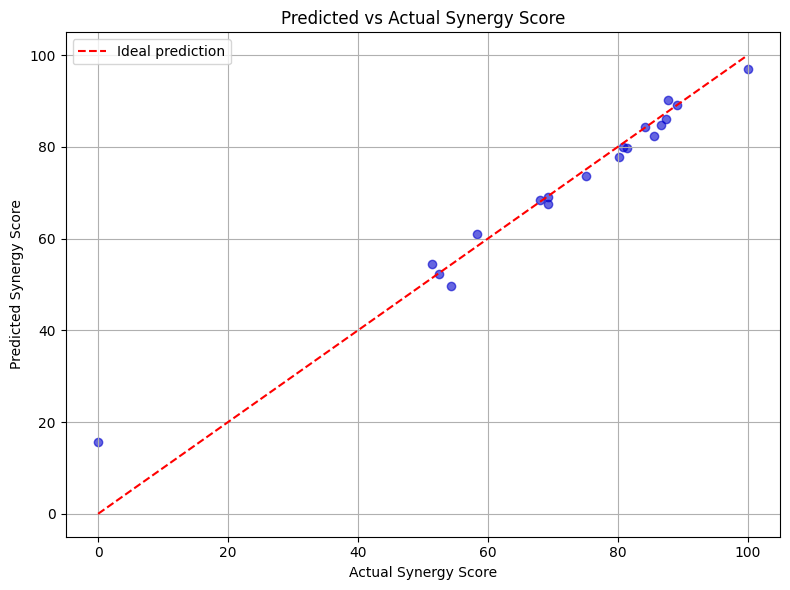

In [ ]:
import matplotlib.pyplot as plt

y_test_values = y_test.values

plt.figure(figsize=(8, 6))
plt.scatter(y_test_values, predictions, color='mediumblue', alpha=0.6)
plt.plot([y_test_values.min(), y_test_values.max()],
         [y_test_values.min(), y_test_values.max()],
         color='red', linestyle='--', label='Ideal prediction')
plt.xlabel('Actual Synergy Score')
plt.ylabel('Predicted Synergy Score')
plt.title('Predicted vs Actual Synergy Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()